In [1]:
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import IPython
import sklearn

In [2]:
#uploading the data with header
# data :https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/
data=pd.read_csv('auto-mpg.csv', delim_whitespace=True,names=["mpg","cylinders","displacement","horsepower","weight","acceleration",
                                                                "model year","origin","car name"])
print(data.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [3]:
data.dropna()
data.replace('?',-9999,inplace=True)
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
#Spliting data and target
X=np.array(data.drop(['mpg','car name'],1))
Y=np.array(data['mpg'])
Y=Y.astype('int')

In [5]:
#test train split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=0)
X_train.shape

(298, 7)

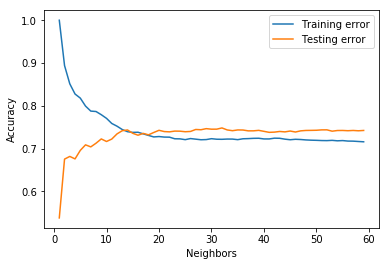

In [6]:
#KNearestNeighbours Regression
from sklearn.neighbors import KNeighborsRegressor
train_error_KNR=[]
test_error_KNR=[]
n=range(1,60)
import matplotlib.pyplot as plt
for i in n:
    KNR=KNeighborsRegressor(n_neighbors=i)
    KNR.fit(X_train,Y_train)
    train_error_KNR.append(KNR.score(X_train,Y_train))
    test_error_KNR.append(KNR.score(X_test,Y_test))
plt.plot(n,train_error_KNR,label="Training error")   
plt.plot(n,test_error_KNR,label="Testing error")
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Points to know
1.Test error is less the training error till neighbors are equal to 20.
2.After neighbors equal to 20 ,test error is greater then train error (overfitting).
3.From 1 to 14 test error is far less train error (underfitting).
4.The sweet spot for neighbors equal from 14 to 20.
5.We are getting test accuracy upto 75%

In [7]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression().fit(X_train,Y_train)
print("Linear Regression Coefficient:{}".format(lr.coef_))
print("Linear Regression intercept:{}".format(lr.intercept_))
print("Linear Regression Training error:{}".format(lr.score(X_train,Y_train)))
print("Linear Regression Testing error:{}".format(lr.score(X_test,Y_test)))

Linear Regression Coefficient:[-2.97541024e-01  1.85917749e-02  7.10158215e-05 -6.96899983e-03
  2.96427691e-01  7.23823180e-01  1.52197789e+00]
Linear Regression intercept:-20.083243179462677
Linear Regression Training error:0.8160185330235501
Linear Regression Testing error:0.8116796251929705


Since the Training and Test error is clso we can say that there is niether overfitting or underfiiting

In [8]:
#Ridge Regression
from sklearn.linear_model import Ridge
r=Ridge().fit(X_train,Y_train)
print("Ridge Regression Coefficient:{}".format(r.coef_))
print("Ridge Regression intercept:{}".format(r.intercept_))
print("Ridge Regression Training error:{}".format(r.score(X_train,Y_train)))
print("Ridge Regression Testing error:{}".format(r.score(X_test,Y_test)))

Ridge Regression Coefficient:[-2.92240478e-01  1.84167694e-02  7.17616770e-05 -6.96859660e-03
  2.95466957e-01  7.23583828e-01  1.50779369e+00]
Ridge Regression intercept:-20.023933358142145
Ridge Regression Training error:0.8160172129669989
Ridge Regression Testing error:0.8117780349116067


Since the Training and Test error is clso we can say that there is niether overfitting or underfiiting

In [9]:
#Lasso Regression
from sklearn.linear_model import Lasso
l=Lasso().fit(X_train,Y_train)
print("Lasso Regression Coefficient:{}".format(l.coef_))
print("Lasso Regression intercept:{}".format(l.intercept_))
print("Lasso Regression Training error:{}".format(l.score(X_train,Y_train)))
print("Lasso Regression Testing error:{}".format(l.score(X_test,Y_test)))

Lasso Regression Coefficient:[-0.00000000e+00 -1.17557363e-03  1.34211154e-04 -6.60012182e-03
  1.98024913e-02  6.52875607e-01  0.00000000e+00]
Lasso Regression intercept:-6.862972801889033
Lasso Regression Training error:0.7972985759470326
Lasso Regression Testing error:0.8186572802479951


Since the Training and Test error is clso we can say that there is niether overfitting or underfiiting

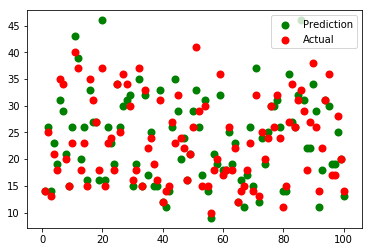

In [10]:
#Deccisio Tree Regression
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor().fit(X_train,Y_train)
Y_PR=DTR.predict(X_test)
#no of test example=100
i=range(1,101)
plt.scatter(i,Y_PR,color="green",label="Prediction",linewidth=2)
plt.scatter(i,Y_test,color="red",label="Actual",linewidth=2)
plt.legend()
plt.show()

In [11]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
print ("Accuracy : ",accuracy_score(Y_test,Y_PR))     
print("Report : ",classification_report(Y_test, Y_PR)) 

Accuracy :  0.14
Report :               precision    recall  f1-score   support

        9.0       0.00      0.00      0.00         0
       10.0       0.00      0.00      0.00         1
       11.0       0.00      0.00      0.00         1
       12.0       0.67      1.00      0.80         2
       13.0       0.00      0.00      0.00         2
       14.0       0.17      0.17      0.17         6
       15.0       0.33      0.22      0.27         9
       16.0       0.20      0.33      0.25         3
       17.0       0.00      0.00      0.00         3
       18.0       0.33      0.10      0.15        10
       19.0       0.00      0.00      0.00         1
       20.0       0.33      0.25      0.29         4
       21.0       0.33      0.50      0.40         2
       22.0       0.00      0.00      0.00         4
       23.0       0.00      0.00      0.00         5
       24.0       0.00      0.00      0.00         5
       25.0       0.00      0.00      0.00         3
       26.0       

C:\Users\simi_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\simi_\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Decission Tree score is very poor

Since Ridge regression score is the best , we will optimise it 

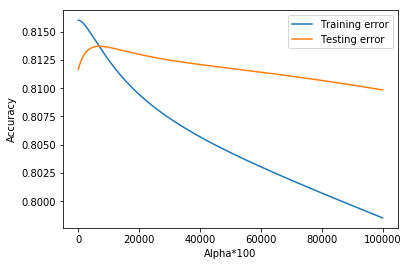

In [12]:
i =range(1,100000)
train_error_R=[]
test_error_R=[]
for a in i:
    b=float(a/100)
    r=Ridge(alpha=b).fit(X_train,Y_train)
    train_error_R.append(r.score(X_train,Y_train))
    test_error_R.append(r.score(X_test,Y_test))
plt.plot(i,train_error_R,label="Training error")   
plt.plot(i,test_error_R,label="Testing error")
plt.xlabel("Alpha*100")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Maximum acuuracy is close to 81.5%